In [1]:
#Establish library
import csv
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
#Import dataset 1
with open("VSL_Data1.csv", "r") as infile:
    reader=list(csv.DictReader(infile))
    data1={}
    for row in reader:
        for header, value in row.items():
            try:
                data1[header].append(value)
            except KeyError:
                data1[header]=[value]
                
time1=data1["Time"]
speed1=data1["Speed"]
occupancy1=data1["Occu"]
label1=data1["Label"]

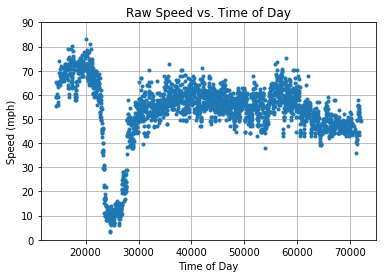

In [3]:
#Task 1
plt.plot(time1, speed1, '.')
plt.title("Raw Speed vs. Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Speed (mph)")
plt.ylim([0, 90])
plt.grid()

In [4]:
#NOTE: I know the X-axis is incorrect, and I tried to import the data using the pandas dataframe to correct it, but it made some
#plots for future problems incorrect. Because of this, I left the X-axis as you see above.

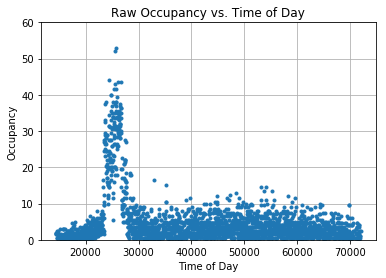

In [5]:
#Task 1
plt.plot(time1, occupancy1, '.')
plt.title("Raw Occupancy vs. Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Occupancy")
plt.ylim([0, 60])
plt.yticks(range(0,70,10))
plt.grid()

C:\Users\Trevor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


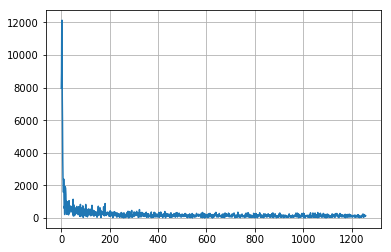

In [6]:
#FFT of speed from dataset 1
speedfft1 = np.fft.fft(speed1)

plt.plot(abs(speedfft1[1:len(speedfft1)/2]))
plt.grid()

C:\Users\Trevor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


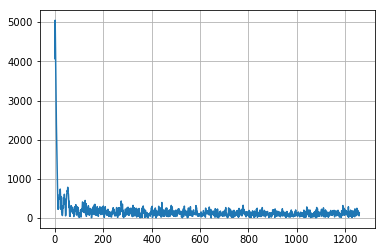

In [7]:
#FFT of occupancy from dataset 1
occupancyfft1 = np.fft.fft(occupancy1)

plt.plot(abs(occupancyfft1[1:len(occupancyfft1)/2]))
plt.grid()

C:\Users\Trevor\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


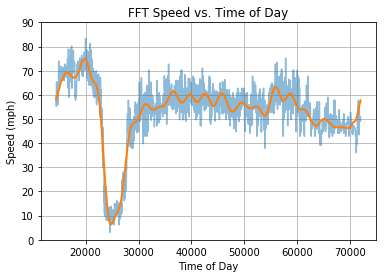

In [8]:
#Task 2
thresholdspeed1 = 1500
maskspeed1 = abs(speedfft1) > thresholdspeed1
speedclean1 = speedfft1 * maskspeed1
speedifft1 = np.fft.ifft(speedclean1)

plt.plot (time1, speed1, alpha = 0.5)
plt.plot (time1, speedifft1, linewidth = 2.0)
plt.title("FFT Speed vs. Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Speed (mph)")
plt.ylim([0, 90])
plt.grid()

C:\Users\Trevor\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


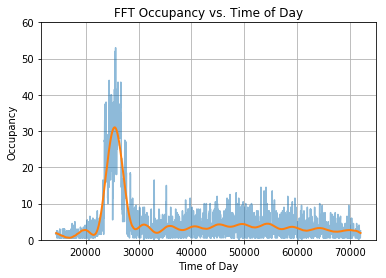

In [9]:
#Task 2
thresholdoccupancy1 = 800
maskoccupancy1 = abs(occupancyfft1) > thresholdoccupancy1
occupancyclean1 = occupancyfft1 * maskoccupancy1
occupancyifft1 = np.fft.ifft(occupancyclean1)

plt.plot (time1, occupancy1, alpha = 0.5)
plt.plot (time1, occupancyifft1, linewidth = 2.0)
plt.title("FFT Occupancy vs. Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Occupancy")
plt.ylim([0, 60])
plt.yticks(range(0,70,10))
plt.grid()

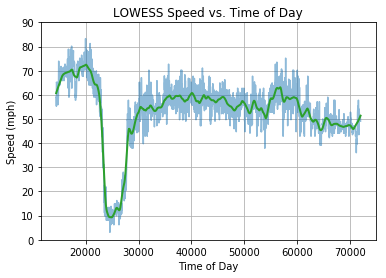

In [10]:
#Task 2
speedlowess1 = lowess(speed1, time1, is_sorted = True, frac=0.025, it=0)

plt.plot (time1, speed1, alpha = 0.5)
plt.plot (time1, speedlowess1,  linewidth = 2.0)
plt.title("LOWESS Speed vs. Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Speed (mph)")
plt.ylim([0, 90])
plt.grid()

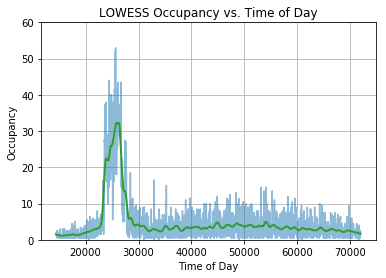

In [11]:
#Task 2
occupancylowess1 = lowess(occupancy1, time1, is_sorted = True, frac = 0.025, it=0)

plt.plot (time1, occupancy1, alpha = 0.5)
plt.plot (time1, occupancylowess1, linewidth = 2.0)
plt.title("LOWESS Occupancy vs. Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Occupancy")
plt.ylim([0, 60])
plt.yticks(range(0,70,10))
plt.grid()

In [12]:
#Prepare dataset 1 for analysis
transspeed1 = np.array([speed1]).T
transoccupancy1 = np.array([occupancy1]).T
translabel1 = np.array([label1]).T

transspeedifft1 = np.array([speedifft1]).T
transoccupancyifft1 = np.array([occupancyifft1]).T

newspeedlowess1 = np.delete(speedlowess1, 0, 1)
newoccupancylowess1 = np.delete(occupancylowess1, 0, 1)

Raw1 = np.concatenate((transspeed1,transoccupancy1), axis=1).astype(np.float)
FFT1 = np.concatenate((transspeedifft1,transoccupancyifft1), axis=1).astype(np.float)
Lowess1 = np.concatenate((newspeedlowess1,newoccupancylowess1), axis=1).astype(np.float)

clf1 = GaussianNB()
clf2 = SVC()

C:\Users\Trevor\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


In [13]:
#Task 3
clf1.fit(Raw1,label1)
trainaccuracy = clf1.predict(Raw1)
accuracy_score(label1,trainaccuracy)

0.78897262990876638

In [14]:
#Task 3
clf1.fit(FFT1,label1)
trainaccuracy = clf1.predict(FFT1)
accuracy_score(label1,trainaccuracy)

0.92502975009916699

In [15]:
#Task 3
clf1.fit(Lowess1,label1)
trainaccuracy = clf1.predict(Lowess1)
accuracy_score(label1,trainaccuracy)

0.92185640618802067

In [16]:
#Task 3
clf2.fit(Raw1,label1)
trainaccuracy = clf2.predict(Raw1)
accuracy_score(label1,trainaccuracy)

0.82546608488694961

In [17]:
#Task 3
clf2.fit(FFT1,label1)
trainaccuracy = clf2.predict(FFT1)
accuracy_score(label1,trainaccuracy)

0.96231654105513686

In [18]:
#Task 3
clf2.fit(Lowess1,label1)
trainaccuracy = clf2.predict(Lowess1)
accuracy_score(label1,trainaccuracy)

0.94486314954383177

In [19]:
#Import dataset 2
with open("VSL_Data2.csv", "r") as infile:
    reader=list(csv.DictReader(infile))
    data2={}
    for row in reader:
        for header, value in row.items():
            try:
                data2[header].append(value)
            except KeyError:
                data2[header]=[value]
                
time2=data2["Time"]
speed2=data2["Speed"]
occupancy2=data2["Occu"]
label2=data2["Label"]

C:\Users\Trevor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


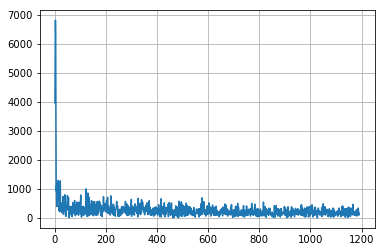

In [20]:
#FFT of speed from dataset 2
speedfft2 = np.fft.fft(speed2)

plt.plot(abs(speedfft2[1:len(speedfft2)/2]))
plt.grid()

C:\Users\Trevor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


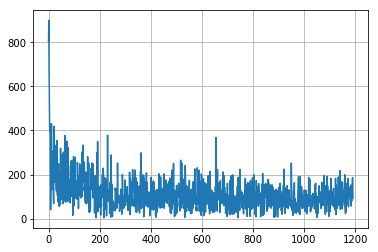

In [21]:
#FFT of occupancy from dataset 2
occupancyfft2 = np.fft.fft(occupancy2)

plt.plot(abs(occupancyfft2[1:len(occupancyfft2)/2]))
plt.grid()

In [22]:
#FFT smoothing of dataset 2
thresholdspeed2 = 1000
maskspeed2 = abs(speedfft2) > thresholdspeed2
speedclean2 = speedfft2 * maskspeed2
speedifft2 = np.fft.ifft(speedclean2)

thresholdoccupancy2 = 400
maskoccupancy2 = abs(occupancyfft2) > thresholdoccupancy2
occupancyclean2 = occupancyfft2 * maskoccupancy2
occupancyifft2 = np.fft.ifft(occupancyclean2)

In [23]:
#Lowess smoothing of dataset 2
speedlowess2 = lowess(speed2, time2, is_sorted = True, frac=0.025, it=0)
occupancylowess2 = lowess(occupancy2, time2, is_sorted = True, frac = 0.025, it=0)

In [24]:
#Prepare dataset 2 for analysis
transspeed2 = np.array([speed2]).T
transoccupancy2 = np.array([occupancy2]).T
translabel2 = np.array([label2]).T

transspeedifft2 = np.array([speedifft2]).T
transoccupancyifft2 = np.array([occupancyifft2]).T

newspeedlowess2 = np.delete(speedlowess2, 0, 1)
newoccupancylowess2 = np.delete(occupancylowess2, 0, 1)

Raw2 = np.concatenate((transspeed2,transoccupancy2), axis=1).astype(np.float)
FFT2 = np.concatenate((transspeedifft2,transoccupancyifft2), axis=1).astype(np.float)
Lowess2 = np.concatenate((newspeedlowess2,newoccupancylowess2), axis=1).astype(np.float)

C:\Users\Trevor\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


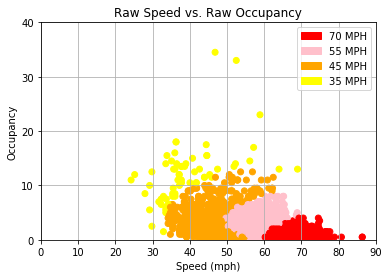

In [25]:
#Task 4
prediction = clf1.predict(Raw2)

colorkey = {"70 MPH":"red","55 MPH":"pink","45 MPH":"orange","35 MPH":"yellow"}

plt.scatter(transspeed2, transoccupancy2, color=[colorkey[i] for i in prediction])
plt.title("Raw Speed vs. Raw Occupancy")
plt.xlabel("Speed (mph)")
plt.xlim([0,90])
plt.ylabel("Occupancy")
plt.ylim([0, 40])
plt.yticks(range(0,50,10))

red = mpatches.Patch(color="red",label="70 MPH")
pink = mpatches.Patch(color="pink",label="55 MPH")
orange = mpatches.Patch(color="orange",label="45 MPH")
yellow = mpatches.Patch(color="yellow",label="35 MPH")
plt.legend(handles=[red,pink,orange,yellow])
plt.grid()

C:\Users\Trevor\Anaconda3\lib\site-packages\numpy\core\numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


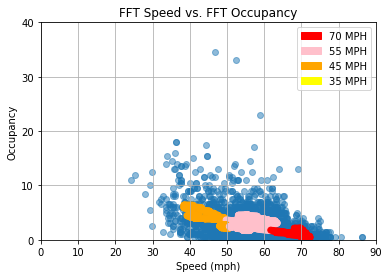

In [26]:
#Task 4
prediction = clf1.predict(FFT2)

colorkey = {"70 MPH":"red","55 MPH":"pink","45 MPH":"orange","35 MPH":"yellow"}

plt.scatter(transspeed2, transoccupancy2, alpha = 0.5)
plt.scatter(transspeedifft2, transoccupancyifft2, color=[colorkey[i] for i in prediction])
plt.title("FFT Speed vs. FFT Occupancy")
plt.xlabel("Speed (mph)")
plt.xlim([0,90])
plt.ylabel("Occupancy")
plt.ylim([0, 40])
plt.yticks(range(0,50,10))

red = mpatches.Patch(color="red",label="70 MPH")
pink = mpatches.Patch(color="pink",label="55 MPH")
orange = mpatches.Patch(color="orange",label="45 MPH")
yellow = mpatches.Patch(color="yellow",label="35 MPH")
plt.legend(handles=[red,pink,orange,yellow])
plt.grid()

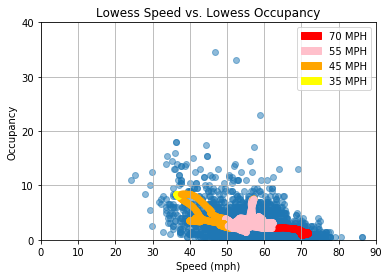

In [27]:
#Task 4
prediction = clf1.predict(Lowess2)

colorkey = {"70 MPH":"red","55 MPH":"pink","45 MPH":"orange","35 MPH":"yellow"}

plt.scatter(transspeed2, transoccupancy2, alpha = 0.5)
plt.scatter(newspeedlowess2, newoccupancylowess2, color=[colorkey[i] for i in prediction])
plt.title("Lowess Speed vs. Lowess Occupancy")
plt.xlabel("Speed (mph)")
plt.xlim([0,90])
plt.ylabel("Occupancy")
plt.ylim([0, 40])
plt.yticks(range(0,50,10))

red = mpatches.Patch(color="red",label="70 MPH")
pink = mpatches.Patch(color="pink",label="55 MPH")
orange = mpatches.Patch(color="orange",label="45 MPH")
yellow = mpatches.Patch(color="yellow",label="35 MPH")
plt.legend(handles=[red,pink,orange,yellow])
plt.grid()

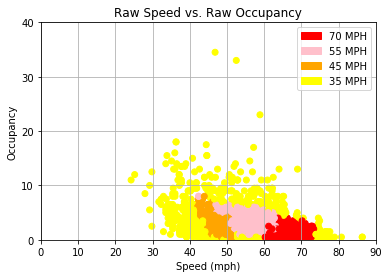

In [28]:
#Task 4
prediction = clf2.predict(Raw2)

colorkey = {"70 MPH":"red","55 MPH":"pink","45 MPH":"orange","35 MPH":"yellow"}

plt.scatter(transspeed2, transoccupancy2, color=[colorkey[i] for i in prediction])
plt.title("Raw Speed vs. Raw Occupancy")
plt.xlabel("Speed (mph)")
plt.xlim([0,90])
plt.ylabel("Occupancy")
plt.ylim([0, 40])
plt.yticks(range(0,50,10))

red = mpatches.Patch(color="red",label="70 MPH")
pink = mpatches.Patch(color="pink",label="55 MPH")
orange = mpatches.Patch(color="orange",label="45 MPH")
yellow = mpatches.Patch(color="yellow",label="35 MPH")
plt.legend(handles=[red,pink,orange,yellow])
plt.grid()

C:\Users\Trevor\Anaconda3\lib\site-packages\numpy\core\numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


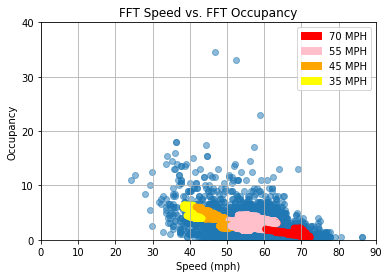

In [29]:
#Task 4
prediction = clf2.predict(FFT2)

colorkey = {"70 MPH":"red","55 MPH":"pink","45 MPH":"orange","35 MPH":"yellow"}

plt.scatter(transspeed2, transoccupancy2, alpha = 0.5)
plt.scatter(transspeedifft2, transoccupancyifft2, color=[colorkey[i] for i in prediction])
plt.title("FFT Speed vs. FFT Occupancy")
plt.xlabel("Speed (mph)")
plt.xlim([0,90])
plt.ylabel("Occupancy")
plt.ylim([0, 40])
plt.yticks(range(0,50,10))

red = mpatches.Patch(color="red",label="70 MPH")
pink = mpatches.Patch(color="pink",label="55 MPH")
orange = mpatches.Patch(color="orange",label="45 MPH")
yellow = mpatches.Patch(color="yellow",label="35 MPH")
plt.legend(handles=[red,pink,orange,yellow])
plt.grid()

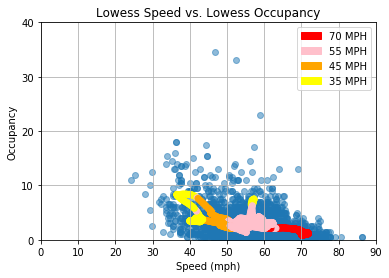

In [30]:
#Task 4
prediction = clf2.predict(Lowess2)

colorkey = {"70 MPH":"red","55 MPH":"pink","45 MPH":"orange","35 MPH":"yellow"}

plt.scatter(transspeed2, transoccupancy2, alpha = 0.5)
plt.scatter(newspeedlowess2, newoccupancylowess2, color=[colorkey[i] for i in prediction])
plt.title("Lowess Speed vs. Lowess Occupancy")
plt.xlabel("Speed (mph)")
plt.xlim([0,90])
plt.ylabel("Occupancy")
plt.ylim([0, 40])
plt.yticks(range(0,50,10))

red = mpatches.Patch(color="red",label="70 MPH")
pink = mpatches.Patch(color="pink",label="55 MPH")
orange = mpatches.Patch(color="orange",label="45 MPH")
yellow = mpatches.Patch(color="yellow",label="35 MPH")
plt.legend(handles=[red,pink,orange,yellow])
plt.grid()

In [31]:
#Discussion

#Based on the plots generated for the FFT smoothing technique and the LOWESS smoothing technique, it seems that the FFT data
#smoothing process resulted in a better filtered result. The LOWESS technique was still impacted by small fluctuations in the
#initial data based on the resultant graphs. This is further reinforced during the classification techniques in Task 3. Based on 
#the model accuracy results, the FFT performed better than its LOWESS smoothing counterpart. Also, the SVC method of 
#classification worked better for each of the 3 datasets when compared to the Gaussian Naive Bayes method. Lastly, the 
#predicted labels from Task 3 were applied to the new dataset in Task 4 with unique results for each dataset/classification 
#combination. Interestingly, no speed and occupancy combination was classified as "35 MPH" when using the FFT dataset with 
#the Gaussian Naive Bayes method. All other combinations included each of the 4 label categories.